In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

from tqdm import tqdm

In [6]:
#Define Column Names for Data 
col_1 = ['unit', 'time', 'op1', 'op2', 'op3']
col_2 = [f'sr{i+1}' for i in range(21)]
columns = col_1 + col_2

# Load datasets and assign column names
df = pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\train_FD003.txt', delim_whitespace=True, header=None, names=columns)
test = pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\test_FD003.txt', delim_whitespace=True, header=None, names=columns)

# Add features to training data
df['max_time'] = df.groupby('unit')['time'].transform('max')
df['remaining_time'] = df['max_time'] - df['time']
df['label'] = df['remaining_time'].clip(upper=130)

# Preview data
df.head()

C:\Users\65962\AppData\Local\Temp\ipykernel_28488\3909403731.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\train_FD003.txt', delim_whitespace=True, header=None, names=columns)
C:\Users\65962\AppData\Local\Temp\ipykernel_28488\3909403731.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test = pd.read_csv(r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\test_FD003.txt', delim_whitespace=True, header=None, names=columns)


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8.4246,0.03,391,2388,100.0,39.11,23.3537,259,258,130
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8.4403,0.03,392,2388,100.0,38.99,23.4491,259,257,130
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8.3901,0.03,391,2388,100.0,38.85,23.3669,259,256,130
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8.3878,0.03,392,2388,100.0,38.96,23.2951,259,255,130
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8.3869,0.03,392,2388,100.0,39.14,23.4583,259,254,130


In [7]:
test.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,521.89,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,521.85,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,522.10,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,522.45,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,521.91,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

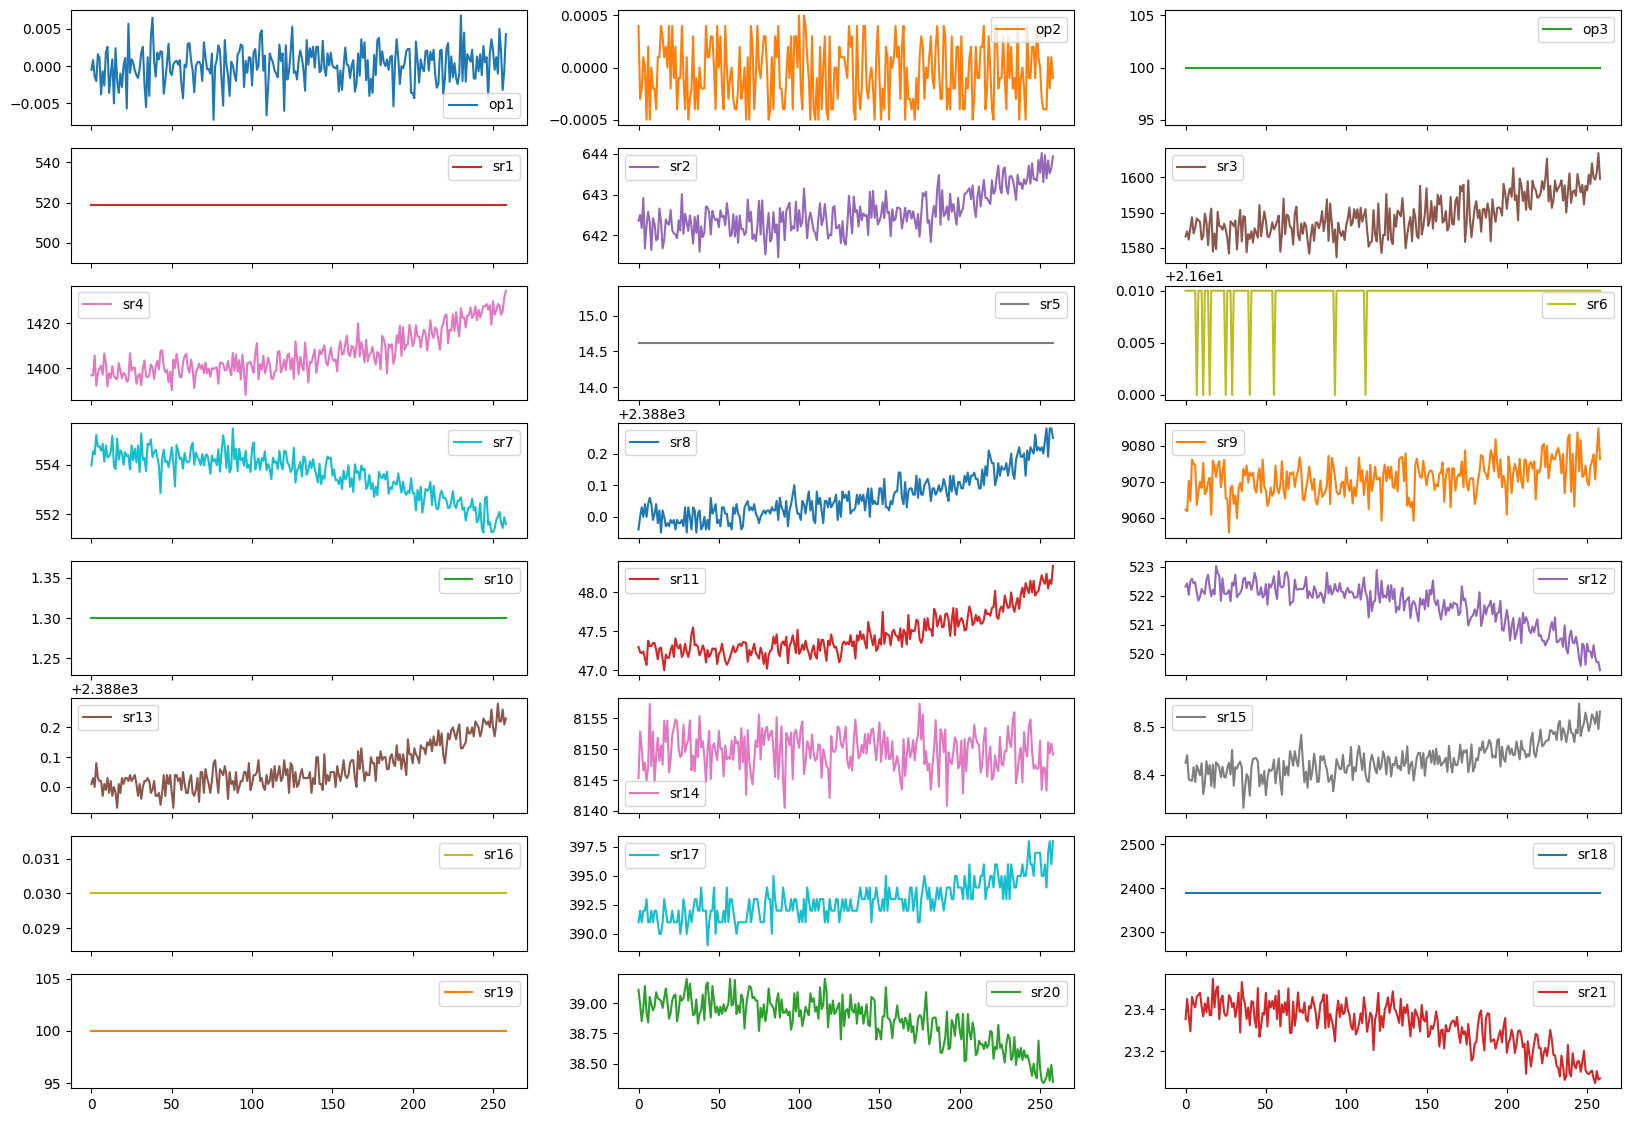

In [8]:
#Plot Sensors for Specific Units 
#split the data into 2: also removing OP settings; keep all sensors (removing OP settings enable extraction to be faster)
df_1=df[df['unit']==1].iloc[:,2:]
df_1[['op1', 'op2', 'op3','sr1', 'sr2', 'sr3', 'sr4', 'sr5', 'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
      'sr11', 'sr12', 'sr13', 'sr14', 'sr15', 'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']].plot(subplots=True, figsize=(20, 14), layout=(8, 3))

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

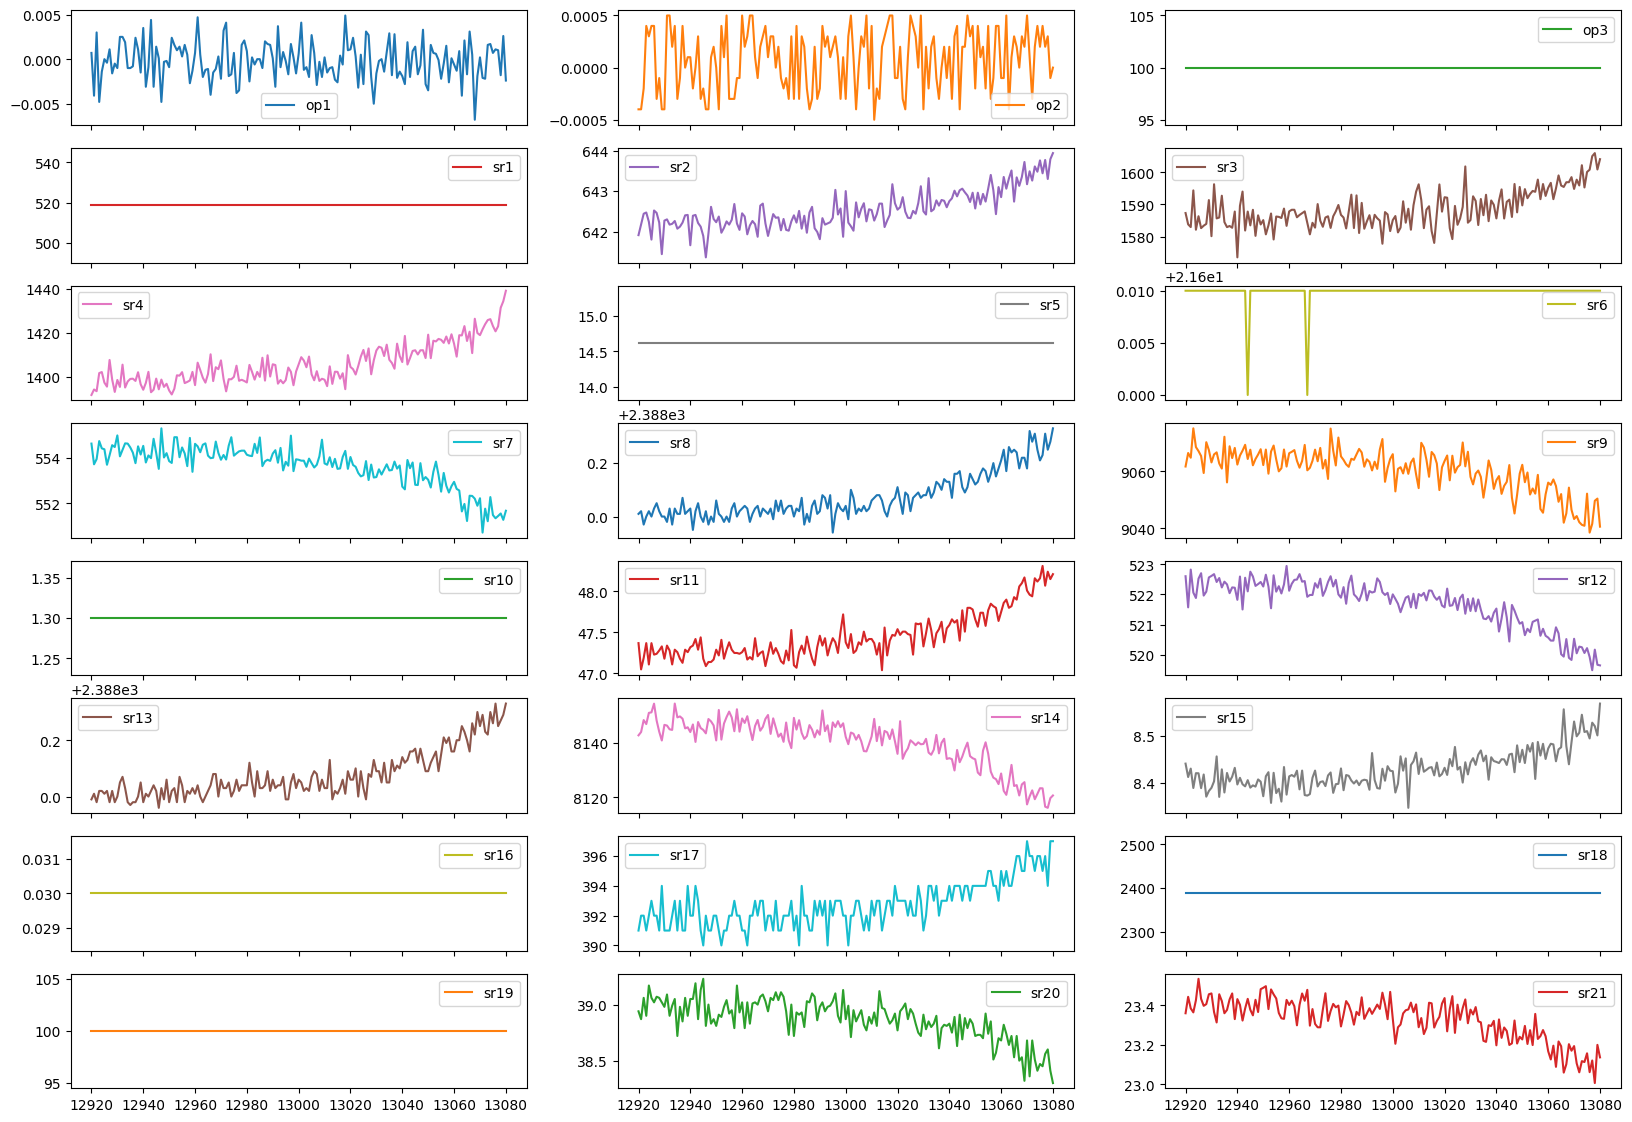

In [43]:
df_20=df[df['unit']==50].iloc[:,2:]
df_20[['op1', 'op2', 'op3','sr1', 'sr2', 'sr3', 'sr4', 'sr5', 'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
      'sr11', 'sr12', 'sr13', 'sr14', 'sr15', 'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']].plot(subplots=True, figsize=(20, 14), layout=(8, 3))

In [44]:
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh.feature_extraction import EfficientFCParameters

In [45]:
#Rolling time series data
window_size = 30

rolling_params = {
    "column_id": "unit",
    "column_sort": "time",
    "max_timeshift": window_size - 1,
    "min_timeshift": window_size-1,
    "rolling_direction": 1
}

rolled_df = roll_time_series(df, **rolling_params)

rolled_test = roll_time_series(test, **rolling_params)

Rolling: 100%|█████████████████████████████████████████████████████████████████████████| 40/40 [00:03<00:00, 10.96it/s]


In [46]:
#Select and extract features (uses all sensors)
selected_cols=['id', 'sr1','sr2', 'sr3', 'sr4', 'sr5',
               'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
                'sr11', 'sr12', 'sr13', 'sr14', 'sr15',
                'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']
selected_df=rolled_df[selected_cols]
selected_test=rolled_test[selected_cols]

#Define function for splitting and extracting features to make extracting easier 
def split_and_extract_features(df, selected_cols, n_parts=10, feature_params=None):
    # Select relevant columns
    selected_df = df[selected_cols]
    
    # Get unique ids and divide them into n parts
    unique_ids = selected_df['id'].unique()
    split_size = len(unique_ids) // n_parts
    
    # Initialize a list to store extracted feature DataFrames
    feature_dfs = []
    
    # Split unique ids into n parts and extract features for each part
    for i in range(n_parts):
        # Determine start and end indices for the current part
        start_idx = i * split_size
        end_idx = (i + 1) * split_size if i < n_parts - 1 else len(unique_ids)
        
        # Filter the DataFrame for the current part based on the unique ids
        part_ids = unique_ids[start_idx:end_idx]
        part_df = selected_df[selected_df['id'].isin(part_ids)]
        
        # Apply feature extraction to the current part
        extracted_features = extract_features(part_df, **feature_params)
        
        # Append the extracted features to the list
        feature_dfs.append(extracted_features)
    
    # Concatenate all extracted feature DataFrames into one
    combined_features = pd.concat(feature_dfs, axis=0)
    return combined_features

# Parameters for feature extraction
extraction_settings = EfficientFCParameters()
feature_params = {"column_id": "id",
                  "impute_function": impute,
                  "default_fc_parameters": extraction_settings}

# Apply the split and feature extraction function to the training data
X = split_and_extract_features(rolled_df, selected_cols, n_parts=10, feature_params=feature_params)

# Apply feature extraction to the test set 
x_test = split_and_extract_features(selected_test, selected_cols, n_parts=10, feature_params=feature_params)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 40/40 [04:36<00:00,  6.90s/it]


In [47]:
#Select relevant features using y label 
y=rolled_df.groupby('id')['label'].last()
X_filtered=select_features(X, y)
print(X_filtered.shape)
X_filtered.head()

(21820, 5040)


sr2__quantile__q_0.4  sr11__ar_coefficient__coeff_0__k_10  \
1 30               642.160                           145.695963   
  31               642.160                           159.059098   
  32               642.126                           163.408786   
  33               642.126                           135.970796   
  34               642.126                            56.407595   

      sr11__cwt_coefficients__coeff_5__w_20__widths_(2, 5, 10, 20)  \
1 30                                         148.165496              
  31                                         148.151922              
  32                                         148.155361              
  33                                         148.150948              
  34                                         148.159029              

      sr11__cwt_coefficients__coeff_6__w_5__widths_(2, 5, 10, 20)  \
1 30                                          56.755452             
  31                                          56.812134             
  32                                          56.857235             
  33                                          56.868995             
  34                                          56.854310             

      sr11__cwt_coefficients__coeff_6__w_10__widths_(2, 5, 10, 20)  \
1 30                                         128.186387              
  31                                         128.163506              
  32                                         128.165764              
  33                                         128.139953              
  34                                         128.121315              

      sr11__cwt_coefficients__coeff_6__w_20__widths_(2, 5, 10, 20)  \
1 30                                         156.316889              
  31                                         156.308245              
  32                                         156.302106              
  33                                         156.313640              
  34                                         156.317002              

      sr11__cwt_coefficients__coeff_7__w_5__widths_(2, 5, 10, 20)  \
1 30                                          51.374270             
  31                                          51.427419             
  32                                          51.440329             
  33                                          51.423344             
  34                                          51.378423             

      sr11__cwt_coefficients__coeff_7__w_10__widths_(2, 5, 10, 20)  \
1 30                                         134.228779              
  31                                         134.222061              
  32                                         134.194968              
  33                                         134.178894              
  34                                         134.163200              

      sr11__cwt_coefficients__coeff_7__w_20__widths_(2, 5, 10, 20)  \
1 30                                         164.090609              
  31                                         164.072953              
  32                                         164.082841              
  33                                         164.089494              
  34                                         164.091769              

      sr11__cwt_coefficients__coeff_8__w_5__widths_(2, 5, 10, 20)  ...  \
1 30                                          43.982041            ...   
  31                                          44.005970            ...   
  32                                          43.990559            ...   
  33                                          43.942489            ...   
  34                                          43.869018            ...   

      sr12__change_quantiles__f_agg_"mean"__isabs_False__qh_0.2__ql_0.0  \
1 30                                               0.13                   
  31                                               0.13                  

In [ ]:
#Scale features 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_filtered)
relevant_features_scaled = scaler.transform(X_filtered)
relevant_features_scaled_df = pd.DataFrame(relevant_features_scaled, columns=X_filtered.columns)

selected_features = relevant_features_scaled_df.columns 
relevant_test_features = x_test[selected_features]
relevant_test_features_scaled = scaler.transform(relevant_test_features)
relevant_test_features_scaled_df = pd.DataFrame(relevant_test_features_scaled, columns=selected_features)

In [ ]:
print(selected_features)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(relevant_features_scaled_df, y, test_size=0.2, random_state=42)

In [ ]:
rul_file_path = r'C:\Users\65962\Desktop\JUPYTER\CMAPSSData\RUL_FD003.txt'
true_rul = pd.read_csv(rul_file_path, header=None, names=['RUL'])

# Assign the true RUL values to Y_test
y_test = true_rul['RUL']

In [58]:
#Define custom evaluation metric (S-score)
def calculate_s_score(y_true, y_pred):
    # Calculate the error between predictions and actual values
    error = y_pred - y_true
    
    # Apply S-score calculation
    s_score = np.where(
        error <= 0, 
        np.exp(-error / 13) - 1, 
        np.exp(error / 10) - 1
    )
    
    # Return the mean S-score
    return np.mean(s_score)


#Define Model Evaluation function 
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test=None, Y_test=None):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = model.predict(X_val)
    
    # Calculate evaluation metrics for validation
    s_score = calculate_s_score(y_val, y_pred)
    mse_val = mean_squared_error(y_val, y_pred)
    rmse_val = mse_val ** 0.5
    
    # Print validation results
    model_name = model.__class__.__name__
    print(f'{model_name} model - Validation Set')
    print('RMSE:', rmse_val)
    print('S-score:', s_score)
    print('---------------------')
    
    results = {'model': model_name, 'rmse_val': rmse_val, 's_score': s_score}
    
    # If test set provided, predict and evaluate on test set
    if X_test is not None and Y_test is not None:
        y_pred_test = model.predict(X_test)
        temp = rolled_test.groupby('id').last()
        temp['prediction'] = y_pred_test
        Y_pred = temp.groupby('unit')['prediction'].last().to_numpy()
        
        # Calculate RMSE for test set
        s_test = calculate_s_score(Y_test, Y_pred)
        mse_test = mean_squared_error(Y_test, Y_pred)
        rmse_test = mse_test ** 0.5
        print(f'{model_name} model - Test Set')
        print('Test RMSE:', rmse_test)
        print('Test score:', s_test)
        print('---------------------')
        
        # Store test results in the results dictionary
        results.update({'rmse_test': rmse_test, 'test_score': s_test})
    
    return results

In [59]:
#USING DEEP LEARNING MODEL WITH PYTORCH
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.base import BaseEstimator, RegressorMixin

def scheduler(epoch, optimizer):
    if epoch < 5:
        lr = 0.001
    else:
        lr = 0.0001
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


class ConvLSTMModel(nn.Module):
    def __init__(self, input_channels, drop_CNN=0.1, drop_dense=0.1, kernel_size=3):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=128, kernel_size=kernel_size, padding=kernel_size//2)
        self.dropout1 = nn.Dropout(p=drop_CNN)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2, padding=1)

        self.conv2 = nn.Conv1d(in_channels=128, out_channels=128, kernel_size=kernel_size, padding=kernel_size//2)
        self.dropout2 = nn.Dropout(p=drop_CNN)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2, padding=1)

        self.lstm1 = nn.LSTM(input_size=128, hidden_size=128, num_layers=1, batch_first=True)
        self.lstm2 = nn.LSTM(input_size=128, hidden_size=128, num_layers=1, batch_first=True)

        self.dropout3 = nn.Dropout(p=drop_dense)
        self.dense1 = nn.Linear(128, 512)
        self.dense2 = nn.Linear(512, 128)
        self.dense3 = nn.Linear(128, 1)

    def forward(self, x):
        # x shape: (batch_size, window_length, input_channels)
        x = x.permute(0, 2, 1)  # Convert to (batch_size, input_channels, window_length)
        x = F.relu(self.conv1(x))
        x = self.dropout1(x)
        x = self.pool1(x)

        x = F.relu(self.conv2(x))
        x = self.dropout2(x)
        x = self.pool2(x)

        x = x.permute(0, 2, 1)  # Convert to (batch_size, seq_length, channels)

        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x = x[:, -1, :]

        # Dropout layer
        x = self.dropout3(x)

        x = F.relu(self.dense1(x))
        x = F.relu(self.dense2(x))
        x = self.dense3(x)
        
        return x


class ConvLSTMRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_channels=1, lr=0.001, batch_size=64, max_epoch=500, drop_CNN=0.1, drop_dense=0.1, kernel_size=3):
        self.lr = lr
        self.batch_size = batch_size
        self.max_epoch = max_epoch
        self.model = ConvLSTMModel(input_channels=input_channels, drop_CNN=drop_CNN, drop_dense=drop_dense, kernel_size=kernel_size)

    def _prepare_input(self, X):
        """
        Detect input data dimensions:
        If the input is two-dimensional data (samples, features), a pseudo-time dimension is added (samples, 1, features).
        If the input is three-dimensional data (samples, seq_length, channels), it is returned directly.
        """
        if X.ndim == 2:
            X = np.expand_dims(X, axis=1) 
        return X

        
    def fit(self, X, y):
        # Detect and adjust input data dimensions
        X = self._prepare_input(X)

        # Convert X, y to torch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

        # Define optimizer
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)
        criterion = nn.MSELoss()

        # Training loop
        self.model.train()
        for epoch in range(self.max_epoch):
            running_loss = 0.0
            permutation = torch.randperm(X_tensor.size(0))
            for i in range(0, X_tensor.size(0), self.batch_size):
                indices = permutation[i:i + self.batch_size]
                batch_x, batch_y = X_tensor[indices], y_tensor[indices]

                optimizer.zero_grad()
                outputs = self.model(batch_x)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            if (epoch + 1) % 1 == 0:
                print(f"Epoch {epoch + 1}/{self.max_epoch}, Loss: {running_loss/X_tensor.size(0):.4f}")

            # adjust learning rate based on epoch
            scheduler(epoch, optimizer)

        return self

    def predict(self, X):
        # Detect and adjust input data dimensions
        X = self._prepare_input(X)

        # Convert X to torch tensor
        X_tensor = torch.tensor(X, dtype=torch.float32)
        
        # Prediction
        self.model.eval()
        with torch.no_grad():
            predictions = self.model(X_tensor).numpy()
        
        return predictions.flatten()


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# List of models to evaluate
models = [XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist'),
          RandomForestRegressor(n_estimators=50,max_depth=15,max_features="sqrt",min_samples_split=10,min_samples_leaf=5,n_jobs=-1),
          MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam", batch_size=64, learning_rate="adaptive", learning_rate_init=0.01, max_iter=500),
          ConvLSTMRegressor(input_channels=X_train.shape[-1], batch_size=64, lr=0.001, max_epoch=10)]

# Evaluate each model
results = []
for model in models:
    result = evaluate_model(model, X_train, y_train, X_val, y_val, X_test=relevant_test_features_scaled_df, Y_test=y_test)
    results.append(result)

# If you want, you can compile the results into a DataFrame for easy comparison

results_df = pd.DataFrame(results)
print(results_df)

XGBRegressor model - Validation Set
RMSE: 6.763636066859619
S-score: 0.7641853456664915
---------------------
XGBRegressor model - Test Set
Test RMSE: 14.842313221101175
Test score: 3.8424762462131756
---------------------
RandomForestRegressor model - Validation Set
RMSE: 6.577322136480817
S-score: 0.7317670462717328
---------------------
RandomForestRegressor model - Test Set
Test RMSE: 15.228014869819093
Test score: 4.067155050296586
---------------------
MLPRegressor model - Validation Set
RMSE: 3.766401451457581
S-score: 0.32983447332884386
---------------------
MLPRegressor model - Test Set
Test RMSE: 17.765766684347817
Test score: 6.764830201374962
---------------------


C:\Users\65962\AppData\Local\Temp\ipykernel_28488\3752264545.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)


Epoch 1/10, Loss: 20.1166
Epoch 2/10, Loss: 0.9485
Epoch 3/10, Loss: 0.5885
Epoch 4/10, Loss: 0.4890
Epoch 5/10, Loss: 0.4205
Epoch 6/10, Loss: 0.3670
Epoch 7/10, Loss: 0.2892
Epoch 8/10, Loss: 0.2666
Epoch 9/10, Loss: 0.2563
Epoch 10/10, Loss: 0.2525
ConvLSTMRegressor model - Validation Set
RMSE: 2.93803459701251
S-score: 0.20477958365011073
---------------------
ConvLSTMRegressor model - Test Set
Test RMSE: 17.67723063532521
Test score: 7.073062450313615
---------------------
                   model  rmse_val   s_score  rmse_test  test_score
0           XGBRegressor  6.763636  0.764185  14.842313    3.842476
1  RandomForestRegressor  6.577322  0.731767  15.228015    4.067155
2           MLPRegressor  3.766401  0.329834  17.765767    6.764830
3      ConvLSTMRegressor  2.938035  0.204780  17.677231    7.073062


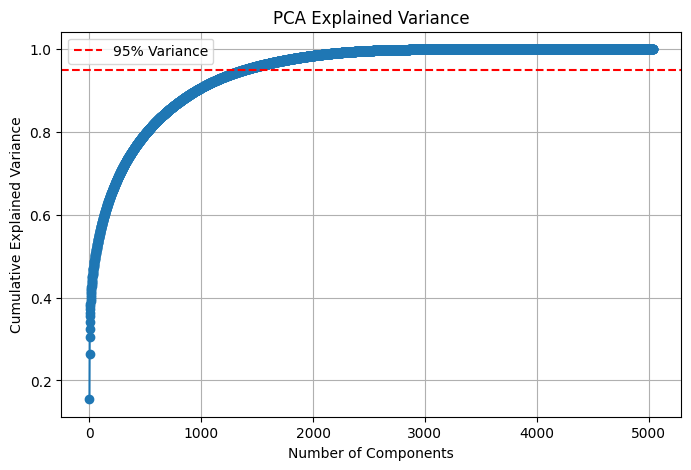

Optimal number of components for 95% variance: 1383


In [61]:
from sklearn.decomposition import PCA
#Initialising and fitting PCA (Principal Component Analysis)
pca = PCA()  # Adjust based on your dataset
pca.fit(X_train)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal number of components to retain at least 95% variance
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Optimal number of components for 95% variance:", optimal_n_components)

In [62]:
pca = PCA(n_components=1302)  # Adjust based on your dataset
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)
X_test_reduced = pca.transform(relevant_test_features_scaled_df)

In [63]:
models = [XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist'),
          RandomForestRegressor(n_estimators=50,max_depth=15,max_features="sqrt",min_samples_split=10,min_samples_leaf=5,n_jobs=-1),
          MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam", batch_size=64, learning_rate="adaptive", learning_rate_init=0.01, max_iter=500),
          ConvLSTMRegressor(input_channels=X_train.shape[-1], batch_size=64, lr=0.001, max_epoch=10)]

# Evaluate each model
results = []
for model in models:
    result = evaluate_model(model, X_train, y_train, X_val, y_val, X_test=relevant_test_features_scaled_df, Y_test=y_test)
    results.append(result)

# If you want, you can compile the results into a DataFrame for easy comparison
results_df = pd.DataFrame(results)
print(results_df)

XGBRegressor model - Validation Set
RMSE: 6.763636066859619
S-score: 0.7641853456664915
---------------------
XGBRegressor model - Test Set
Test RMSE: 14.842313221101175
Test score: 3.8424762462131756
---------------------
RandomForestRegressor model - Validation Set
RMSE: 6.512974383260199
S-score: 0.7155807016604693
---------------------
RandomForestRegressor model - Test Set
Test RMSE: 15.383120386097707
Test score: 4.116682419753695
---------------------
MLPRegressor model - Validation Set
RMSE: 3.566623790849918
S-score: 0.2805901850711563
---------------------
MLPRegressor model - Test Set
Test RMSE: 16.84158354080731
Test score: 5.585134445242464
---------------------


C:\Users\65962\AppData\Local\Temp\ipykernel_28488\3752264545.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)


Epoch 1/10, Loss: 22.4271
Epoch 2/10, Loss: 0.9211
Epoch 3/10, Loss: 0.5830
Epoch 4/10, Loss: 0.4716
Epoch 5/10, Loss: 0.3999
Epoch 6/10, Loss: 0.3471
Epoch 7/10, Loss: 0.2788
Epoch 8/10, Loss: 0.2647
Epoch 9/10, Loss: 0.2515
Epoch 10/10, Loss: 0.2419
ConvLSTMRegressor model - Validation Set
RMSE: 2.9938449289506566
S-score: 0.22712263110083356
---------------------
ConvLSTMRegressor model - Test Set
Test RMSE: 17.83290840293471
Test score: 7.683960861540327
---------------------
                   model  rmse_val   s_score  rmse_test  test_score
0           XGBRegressor  6.763636  0.764185  14.842313    3.842476
1  RandomForestRegressor  6.512974  0.715581  15.383120    4.116682
2           MLPRegressor  3.566624  0.280590  16.841584    5.585134
3      ConvLSTMRegressor  2.993845  0.227123  17.832908    7.683961
